<a href="https://colab.research.google.com/github/votrannhatquang/AI-s-ng-th-7/blob/main/AI_w6_ST7_11_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=48a8a6c4177a11934066da36012352775933d924c9949a865661ca2366d45a11
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


82.33333333333336


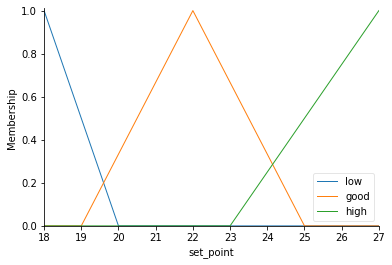

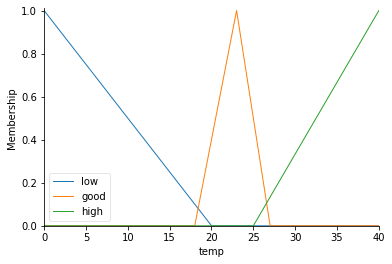

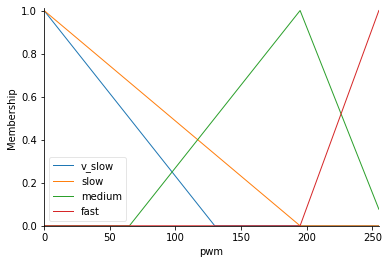

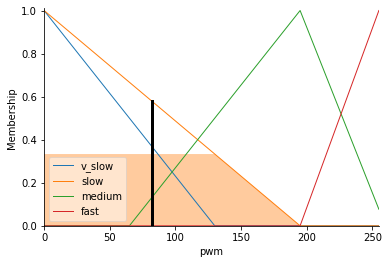

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

set_p=ctrl.Antecedent(np.arange(18,28,1),'set_point')
temp=ctrl.Antecedent(np.arange(0,40.01,0.01),'temp')
press=ctrl.Antecedent(np.arange(0,40.01,0.01),'press')
flow=ctrl.Antecedent(np.arange(0,40.01,0.01),'flow')
pwm=ctrl.Consequent(np.arange(0,256,1),'pwm')
hz=ctrl.Consequent(np.arange(0,61,1),'hz')

set_p['low']=fuzz.trimf(set_p.universe,[18,18,20])
set_p['good']=fuzz.trimf(set_p.universe,[19,22,25])
set_p['high']=fuzz.trimf(set_p.universe,[23,27,27])

temp['low']=fuzz.trimf(temp.universe,[0,0,20])
temp['good']=fuzz.trimf(temp.universe,[18,23,27])
temp['high']=fuzz.trimf(temp.universe,[25,40,40])

pwm['v_slow']=fuzz.trimf(pwm.universe,[0,0,130])
pwm['slow']=fuzz.trimf(pwm.universe,[0,0,195])
pwm['medium']=fuzz.trimf(pwm.universe,[65,195,260])
pwm['fast']=fuzz.trimf(pwm.universe,[195,255,255])

set_p.view()
temp.view()
pwm.view()

rule_1=ctrl.Rule(temp['low']&set_p['low'],pwm['medium'])
rule_2=ctrl.Rule(temp['good']&set_p['low'],pwm['slow'])
rule_3=ctrl.Rule(temp['high']&set_p['low'],pwm['v_slow'])
rule_4=ctrl.Rule(temp['low']&set_p['good'],pwm['fast'])
rule_5=ctrl.Rule(temp['good']&set_p['good'],pwm['slow'])
rule_6=ctrl.Rule(temp['high']&set_p['good'],pwm['v_slow'])
rule_7=ctrl.Rule(temp['low']&set_p['high'],pwm['fast'])
rule_8=ctrl.Rule(temp['good']&set_p['high'],pwm['medium'])
rule_9=ctrl.Rule(temp['high']&set_p['high'],pwm['v_slow'])

pwm_ctrl=ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9])
pwm_c=ctrl.ControlSystemSimulation(pwm_ctrl)
pwm_c.input['set_point']=20
pwm_c.input['temp']=20
pwm_c.compute()
print(pwm_c.output['pwm'])
pwm.view(sim=pwm_c)


141.51023194014059


141.51023194014059


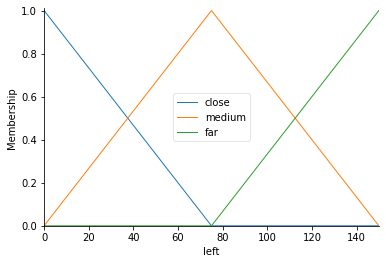

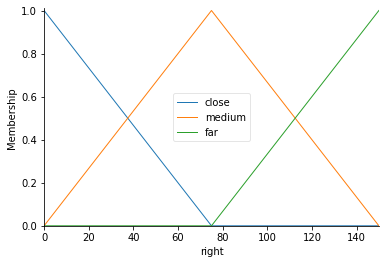

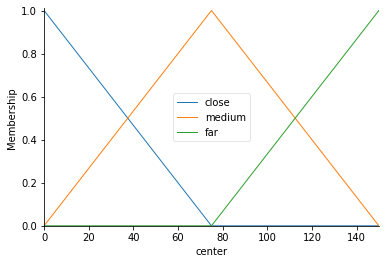

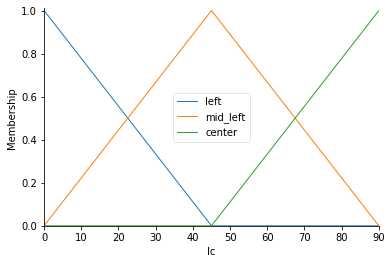

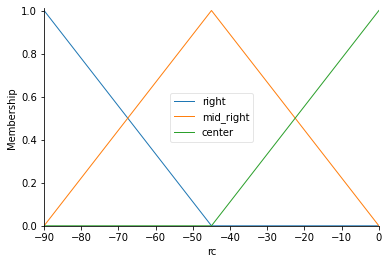

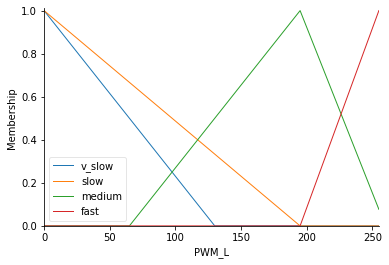

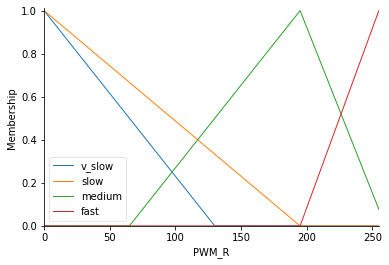

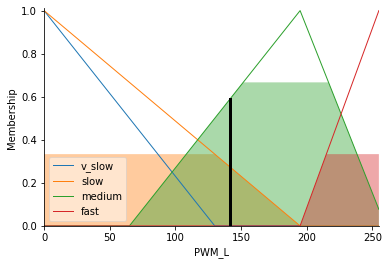

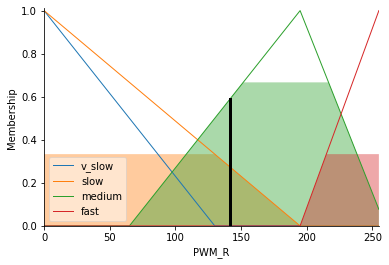

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

L=ctrl.Antecedent(np.arange(0,151,1),'left')
R=ctrl.Antecedent(np.arange(0,151,1),'right')
C=ctrl.Antecedent(np.arange(0,151,1),'center')
LC=ctrl.Consequent(np.arange(0,90.1,0.1),'lc')
RC=ctrl.Consequent(np.arange(-90,0.1,1),'rc')
PWM_L=ctrl.Consequent(np.arange(0,256,1),'PWM_L')
PWM_R=ctrl.Consequent(np.arange(0,256,1),'PWM_R')

L['close']=fuzz.trimf(L.universe,[0,0,75])
L['medium']=fuzz.trimf(L.universe,[0,75,150])
L['far']=fuzz.trimf(L.universe,[75,150,150])

R['close']=fuzz.trimf(R.universe,[0,0,75])
R['medium']=fuzz.trimf(R.universe,[0,75,150])
R['far']=fuzz.trimf(R.universe,[75,150,150])

C['close']=fuzz.trimf(C.universe,[0,0,75])
C['medium']=fuzz.trimf(C.universe,[0,75,150])
C['far']=fuzz.trimf(C.universe,[75,150,150])

LC['left']=fuzz.trimf(LC.universe,[0,0,45])
LC['mid_left']=fuzz.trimf(LC.universe,[0,45,90])
LC['center']=fuzz.trimf(LC.universe,[45,90,90])

RC['right']=fuzz.trimf(RC.universe,[-90,-90,-45])
RC['mid_right']=fuzz.trimf(RC.universe,[-90,-45,0])
RC['center']=fuzz.trimf(RC.universe,[-45,0,0])

PWM_L['v_slow']=fuzz.trimf(PWM_L.universe,[0,0,130])
PWM_L['slow']=fuzz.trimf(PWM_L.universe,[0,0,195])
PWM_L['medium']=fuzz.trimf(PWM_L.universe,[65,195,260])
PWM_L['fast']=fuzz.trimf(PWM_L.universe,[195,255,255])

PWM_R['v_slow']=fuzz.trimf(PWM_R.universe,[0,0,130])
PWM_R['slow']=fuzz.trimf(PWM_R.universe,[0,0,195])
PWM_R['medium']=fuzz.trimf(PWM_R.universe,[65,195,260])
PWM_R['fast']=fuzz.trimf(PWM_R.universe,[195,255,255])

L.view()
R.view()
C.view()
LC.view()
RC.view()
PWM_L.view()
PWM_R.view()

rule_1=ctrl.Rule(L['close']&C['close'],LC['mid_left'])
rule_2=ctrl.Rule(L['close']&C['medium'],LC['left'])
rule_3=ctrl.Rule(L['close']&C['far'],LC['left'])
rule_4=ctrl.Rule(L['medium']&C['close'],LC['center'])
rule_5=ctrl.Rule(L['medium']&C['medium'],LC['mid_left'])
rule_6=ctrl.Rule(L['medium']&C['far'],LC['left'])
rule_7=ctrl.Rule(L['far']&C['close'],LC['center'])
rule_8=ctrl.Rule(L['far']&C['medium'],LC['center'])
rule_9=ctrl.Rule(L['far']&C['far'],LC['mid_left'])

rule_10=ctrl.Rule(R['close']&C['close'],RC['mid_right'])
rule_11=ctrl.Rule(R['close']&C['medium'],RC['right'])
rule_12=ctrl.Rule(R['close']&C['far'],RC['right'])
rule_13=ctrl.Rule(R['medium']&C['close'],RC['center'])
rule_14=ctrl.Rule(R['medium']&C['medium'],RC['mid_right'])
rule_15=ctrl.Rule(R['medium']&C['far'],RC['right'])
rule_16=ctrl.Rule(R['far']&C['close'],RC['center'])
rule_17=ctrl.Rule(R['far']&C['medium'],RC['center'])
rule_18=ctrl.Rule(R['far']&C['far'],RC['mid_right'])

rule_19=ctrl.Rule(RC['right']&LC['left'],[PWM_L['fast'],PWM_R['fast']])
rule_20=ctrl.Rule(RC['right']&LC['mid_left'],[PWM_L['medium'],PWM_R['slow']])
rule_21=ctrl.Rule(RC['right']&LC['center'],[PWM_L['fast'],PWM_R['v_slow']])
rule_22=ctrl.Rule(RC['mid_right']&LC['left'],[PWM_L['slow'],PWM_R['medium']])
rule_23=ctrl.Rule(RC['mid_right']&LC['mid_left'],[PWM_L['medium'],PWM_R['medium']])
rule_24=ctrl.Rule(RC['mid_right']&LC['center'],[PWM_L['medium'],PWM_R['slow']])
rule_25=ctrl.Rule(RC['center']&LC['left'],[PWM_L['v_slow'],PWM_R['fast']])
rule_26=ctrl.Rule(RC['center']&LC['mid_left'],[PWM_L['slow'],PWM_R['fast']])
rule_27=ctrl.Rule(RC['center']&LC['center'],[PWM_L['medium'],PWM_R['medium']])

control_robot=ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,
                                  rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,
                                  rule_21,rule_22,rule_23,rule_24,rule_25,rule_26,rule_27])
controlRobot=ctrl.ControlSystemSimulation(control_robot)
controlRobot.input['left']=50
controlRobot.input['center']=100
controlRobot.input['right']=50
controlRobot.compute()
print(controlRobot.output['PWM_L'])
print('\n')
print(controlRobot.output['PWM_R'])
PWM_L.view(sim=controlRobot)
PWM_R.view(sim=controlRobot)